# Post-processing the data from variational monte carlo

In this jupyter notebook we will present our post-analytical results from several different runs with different parameters. All of the .txt files will be found in the directory "Results". Another reason to use a Jupyter Notebook is to generate reproducibility. Thus, the latest updated jupyter notebook should also show the same figures and results as the ones included in the final report. However, please be aware that the results will change every run as a result of random walks in the metropolis algorithm and initial setup of the system. 

Firstly, we need to define which libraries should be included. Lots of these are self-explanatory, while seaborn is added for some beautiful and handy visualization tools.  

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
from matplotlib import cm
import os
import pandas as pd
import seaborn as sns
#sns.set()

# Where to save the figures and data files
DATA_ID = "Results/"

def data_path(dat_id):
    return os.path.join(DATA_ID, dat_id)

#Latex font for plots
#rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
rc('text', usetex=True)
rc('font', family='serif')
plt.rcParams.update({'font.size': 10}) # Setting all font sizesimport numpy as np

## The energy as a function of the variational parameter alpha

For the easiest case of only one particle in 3 dimensions, we analyse how the ground state energy behave while changing the variational parameter $\alpha$. This situation is treated as a spherical harmoic oscillator with no interaction. 

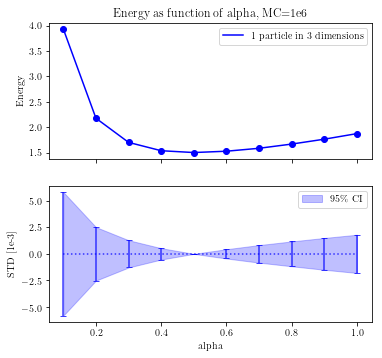

   alpha    Energy       STD
0    0.1  3.931253  0.002974
1    0.2  2.175018  0.001287
2    0.3  1.699973  0.000657
3    0.4  1.535956  0.000273
4    0.5  1.500000  0.000000
5    0.6  1.526203  0.000224
6    0.7  1.583909  0.000422
7    0.8  1.666719  0.000598
8    0.9  1.762831  0.000765
9    1.0  1.872710  0.000921


In [27]:
X = pd.read_fwf(data_path("Task_a/Variational_parameter.dat"))

data_1 = {
    'x': list(X['alpha']),
    'y': list(X['Energy']),
    'yerr': np.array(list(X['STD']*1000))}

zero_array = np.zeros(10)
# plot
fig = plt.figure()
w = 5.78851          # Latex document text width
fig.set_size_inches(w=w*1.0,h= 5.5)
# only errorbar
ax1 = plt.subplot(211)
col = 'blue'
#In case of more plots, we will make sure it's easy to add in a loop
for data in [data_1]:
    ax1.plot(X['alpha'],X['Energy'], color = col)
    ax1.plot(X['alpha'],X['Energy'],'ob', color = col)
# errorbar + fill_between
ax1.set_ylabel("Energy")
plt.title("Energy as function of alpha, MC=1e6")
ax1.legend(['1 particle in 3 dimensions'])
ax1.xaxis.set_major_formatter(plt.NullFormatter())


ax2 = plt.subplot(212)
#In case of more plots, we will make sure it's easy to add in a loop
for data in [data_1]:
    ax2.errorbar(x=data_1['x'],y=zero_array,yerr=1.96*data['yerr'], alpha=.75, fmt=':', capsize=3, capthick=1, color=col)
    data = {
        'x': data['x'],
        'y1': [y - e for y, e in zip(zero_array, 1.96*data['yerr'])],
        'y2': [y + e for y, e in zip(zero_array, 1.96*data['yerr'])]}
    ax2.fill_between(**data, alpha=.25,color = col)

ax2.set_xlabel('alpha')
ax2.set_ylabel('STD [1e-3]')
ax2.legend(['$95\%$ CI'])
plt.savefig(data_path('Task_a/variational_alpha.pgf'))
plt.show()
print(X)

For $\alpha$ = 0.5 we actually achieve exact answer for this model, as seen above. 

## Numerical versus analytical MC

We continue with a simple approach (with $\alpha=0.5$) and extend our program to several particles. In addition, we also include a numerical approach to find the second derivative. 

### 1, 10 and 100 particles are run with $10^5$ Monte Carlo cycles, but 500 particles are run with $10^4$ Monte Carlo cycles and further estimated, because of a very long CPU time. 

In [28]:
part1   = pd.read_fwf(data_path("Task_b/1_particles_3_dim.dat"))
part10  = pd.read_fwf(data_path("Task_b/10_particles_3_dim.dat"))
part50 = pd.read_fwf(data_path("Task_b/50_particles_3_dim.dat"))
part100 = pd.read_fwf(data_path("Task_b/100_particles_3_dim.dat"))
part500 = pd.read_fwf(data_path("Task_b/500_particles_3_dim.dat"))

#particles = [1,10,50,100]
#Uncomment for 500 particles (watch out for less MC cycles)
particles = [1,10,50,100,500]

time_analytical = [part1['Time'][0],part10['Time'][0],part50['Time'][0],part100['Time'][0],part500['Time'][0]]
time_numerical = [part1['Time'][1],part10['Time'][1],part50['Time'][1],part100['Time'][1],part500['Time'][1]]

var_analytical = [part1['Variance'][0],part10['Variance'][0],part50['Variance'][0],part100['Variance'][0],part500['Variance'][0]]
var_numerical  = [part1['Variance'][1],part10['Variance'][1],part50['Variance'][1],part100['Variance'][1],part500['Variance'][1]]

energy_analytical = [part1['Energy'][0],part10['Energy'][0],part50['Energy'][0],part100['Energy'][0],part500['Energy'][0]]
energy_numerical  = [part1['Energy'][1],part10['Energy'][1],part50['Energy'][1],part100['Energy'][1],part500['Energy'][1]]
"""

time_analytical = [part1['Time'][0],part10['Time'][0],part50['Time'][0],part100['Time'][0]]
time_numerical = [part1['Time'][1],part10['Time'][1],part50['Time'][1],part100['Time'][1]]

var_analytical = [part1['Variance'][0],part10['Variance'][0],part50['Variance'][0],part100['Variance'][0]]
var_numerical  = [part1['Variance'][1],part10['Variance'][1],part50['Variance'][1],part100['Variance'][1]]


energy_analytical = [part1['Energy'][0],part10['Energy'][0],part50['Energy'][0],part100['Energy'][0]]
energy_numerical  = [part1['Energy'][1],part10['Energy'][1],part50['Energy'][1],part100['Energy'][1]]
"""

numerical_df = pd.DataFrame({'Particles': particles,'Energy': energy_numerical, 'Time': time_numerical,'Variance': var_numerical})
analytical_df= pd.DataFrame({'Particles': particles,'Energy': energy_analytical,'Time': time_analytical,'Variance': var_analytical})
print("Numerical:\n")
print(numerical_df)
print("\nAnalytical:\n")
print(analytical_df)


Numerical:

   Particles      Energy          Time      Variance
0          1    1.499991      0.421552  3.106866e-10
1         10   14.999907     10.923117  2.976009e-09
2         50   74.999533    294.484330  1.888384e-08
3        100  149.999040   1257.557400  5.207039e-08
4        500  749.994590  94698.413000  2.157642e-06

Analytical:

   Particles  Energy        Time      Variance
0          1     1.5    0.295281 -8.881784e-16
1         10    15.0    1.018006 -2.842171e-14
2         50    75.0    4.804607  9.094947e-13
3        100   150.0   10.573615  3.637979e-12
4        500   750.0  140.529950 -1.164153e-10


From the analytical expression one can see that the given variance is very low, and in fact negative. This is due to numerical precision, which in practice means that the variance is zero. This is also expected from the fact that the energy is exact. 

In [29]:
std_analytical = [(np.sqrt(np.sqrt(var_analytical[0]**2)))*1e-5,(np.sqrt(np.sqrt(var_analytical[1]**2)))*1e-5, np.sqrt(var_analytical[2])*1e-5,np.sqrt(var_analytical[3])*1e-5,(np.sqrt(np.sqrt(var_analytical[4]**2)))*1e-5]
std_numerical  = np.sqrt(var_numerical)*1e-5

numerical_df = pd.DataFrame({'Particles': particles,'Energy': energy_numerical, 'Time': time_numerical,'STD': std_numerical})
analytical_df= pd.DataFrame({'Particles': particles,'Energy': energy_analytical,'Time': time_analytical,'STD': std_analytical})

print("Numerical:\n")
print(numerical_df)
print("\nAnalytical:\n")
print(analytical_df)

Numerical:

   Particles      Energy          Time           STD
0          1    1.499991      0.421552  1.762630e-10
1         10   14.999907     10.923117  5.455281e-10
2         50   74.999533    294.484330  1.374185e-09
3        100  149.999040   1257.557400  2.281894e-09
4        500  749.994590  94698.413000  1.468891e-08

Analytical:

   Particles  Energy        Time           STD
0          1     1.5    0.295281  2.980232e-13
1         10    15.0    1.018006  1.685874e-12
2         50    75.0    4.804607  9.536743e-12
3        100   150.0   10.573615  1.907349e-11
4        500   750.0  140.529950  1.078959e-10


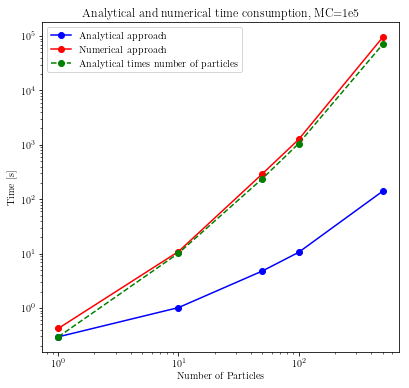

In [5]:
fig, ax1 = plt.subplots()
fig.set_size_inches(w=w*1.0,h= 5.5)

ax1.set_xscale('log')
ax1.set_yscale('log')

ax1.set_ylabel('Time [s]')
ax1.set_xlabel('Number of Particles')

ax1.plot(particles, (analytical_df['Time']), 'bo-', label = 'Analytical approach')
ax1.plot(particles, (numerical_df['Time']), 'ro-', label = 'Numerical approach')
ax1.plot(particles, (analytical_df['Time']*analytical_df['Particles']), 'go--', label = 'Analytical times number of particles')

ax1.legend()
plt.title('Analytical and numerical time consumption, MC=1e5')
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.savefig(data_path('Task_b/analytical_vs_numerical.pgf'))
plt.show()

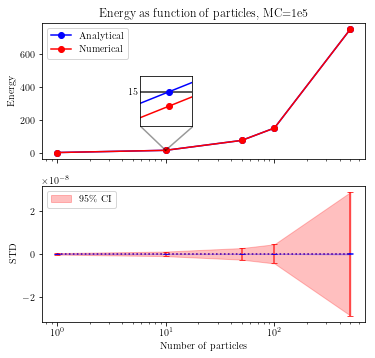

In [6]:
zero_array = np.zeros(len(analytical_df['Particles']))
# plot
fig = plt.figure()
w = 5.78851          # Latex document text width
fig.set_size_inches(w=w*1.0,h= 5.5)
# only errorbar
ax1 = plt.subplot(211)

#In case of more plots, we will make sure it's easy to add in a loop
ax1.plot(analytical_df['Particles'],analytical_df['Energy'],'bo-', label = 'Analytical')
ax1.plot(numerical_df['Particles'],numerical_df['Energy'],'ro-', label = 'Numerical')

# errorbar + fill_between
ax1.set_ylabel("Energy")
plt.title("Energy as function of particles, MC=1e5")


ax1.set_xscale('log')
ax1.xaxis.set_major_formatter(plt.NullFormatter())
ax1.legend()
#ax1.set_yscale('log')
col = ['r','b']
i=0
ax2 = plt.subplot(212)
#In case of more plots, we will make sure it's easy to add in a loop
for data in [numerical_df,analytical_df]:
    ax2.errorbar(x=data['Particles'],y=zero_array,yerr=1.96*data['STD'],color=col[i], alpha=.75, fmt=':', capsize=3, capthick=1)
    data = {
        'x': data['Particles'],
        'y1': [y - e for y, e in zip(zero_array, 1.96*data['STD'])],
        'y2': [y + e for y, e in zip(zero_array, 1.96*data['STD'])]}
    ax2.fill_between(**data, alpha=.25, color=col[i])
    i+=1
ax2.set_xlabel('Number of particles')
ax2.set_ylabel('STD')
ax2.set_xscale('log')
#ax2.set_yscale('log')

ax2.legend(['95$\%$ CI'])

ax3 = fig.add_axes([0.36, 0.62, 0.125, 0.125])
ax3.plot([0,20],[15,15],'black',alpha=.85)
#ax3.plot([10,10],[14,16],'black')
ax3.plot(analytical_df['Particles'],analytical_df['Energy'],'bo-',label='analytical')
ax3.plot(numerical_df['Particles'],numerical_df['Energy'],'ro-',label='numerical')
ax3.set(xlim=(9.99995, 10.00004), ylim=(14.99978, 15.0001))
ax3.set_xscale('log')
ax3.set_yscale('log')

plt.xticks([])

#ax3.axes.get_xaxis().set_ticks([])
#ax3.axes.get_yaxis().set_ticks([])
#ax3.legend(loc='lower left', bbox_to_anchor= (0.0, 1.01), ncol=2, 
#            borderaxespad=0, frameon=False)

ax1.plot([10,6],[15,155],'black', alpha=.40)
ax1.plot([10,17.5],[15,155],'black', alpha=.40)
ax1.text(4.55, 350, '15')

plt.savefig(data_path('Task_b/analytical_vs_numerical_STD_energy.pgf'))

plt.show()

This interval is given as 95% confidence interval. 
It is impressive how accurate the numerical approach is, and this is indeed a great motivation for further studies within the field of numerical derivatives. However, it does lack the efficiency in computational powers, as it is very CPU and time consuming. 

## Brute Force Metropolis Algorithm

In [7]:
bruteForce10 =  pd.read_fwf(data_path("Task_c/Brute_Force10_particles_3_dim.dat"))
bruteForce100 =  pd.read_fwf(data_path("Task_c/Brute_Force100_particles_3_dim.dat"))
importanceSampling10 =  pd.read_fwf(data_path("Task_c/Importance_Sampling10_particles_3_dim.dat"))
importanceSampling100 =  pd.read_fwf(data_path("Task_c/Importance_Sampling100_particles_3_dim.dat"))


print ('Brute Force 10 particles:\n')
print (bruteForce10)
print ('\nBrute Force 100 particles:\n')
print(bruteForce100)

print('\nImportance Sampling 10 particles:\n')
print(importanceSampling10)
print('\nImportance Sampling 100 particles:\n')
print(importanceSampling100)

Brute Force 10 particles:

    StepLength     Rate  Energy      Variance      Time
0         0.05  0.98555    15.0 -2.842171e-14  1.019620
1         0.10  0.97472    15.0 -2.842171e-14  1.012320
2         0.15  0.96034    15.0 -2.842171e-14  1.009815
3         0.20  0.94584    15.0 -2.842171e-14  1.012473
4         0.25  0.93390    15.0 -2.842171e-14  1.029700
5         0.30  0.91949    15.0 -2.842171e-14  1.016877
6         0.35  0.90531    15.0 -2.842171e-14  1.014381
7         0.40  0.89312    15.0 -2.842171e-14  1.013804
8         0.45  0.87831    15.0 -2.842171e-14  1.011075
9         0.50  0.86738    15.0 -2.842171e-14  1.089592
10        0.55  0.85285    15.0 -2.842171e-14  1.030606
11        0.60  0.83969    15.0 -2.842171e-14  1.013782
12        0.65  0.82880    15.0 -2.842171e-14  1.011857
13        0.70  0.81120    15.0 -2.842171e-14  1.011853
14        0.75  0.79923    15.0 -2.842171e-14  1.011834
15        0.80  0.78587    15.0 -2.842171e-14  1.012081
16        0.85  0.772

### Starting with 10 particles with MC = 1e5

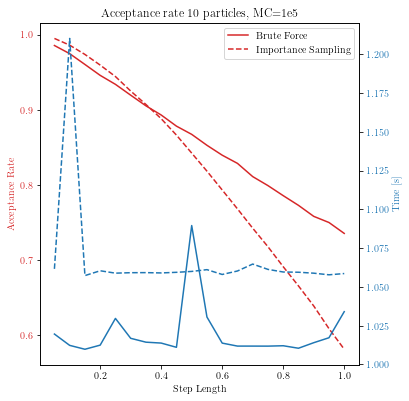

In [8]:
fig, ax1 = plt.subplots()
# plot
w = 5.78851          # Latex document text width
fig.set_size_inches(w=w*1.0,h= 5.5)
color = 'tab:red'
ax1.set_xlabel('Step Length')
ax1.set_ylabel('Acceptance Rate', color=color)


ax1.plot(bruteForce10.iloc[:,0],  bruteForce10['Rate'], color=color, label='Brute Force')
ax1.tick_params(axis='y', labelcolor=color)
ax1.plot(importanceSampling10.iloc[:,0],  importanceSampling10['Rate'], color=color,linestyle='dashed', label='Importance Sampling')


ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color = 'tab:blue'
ax2.set_ylabel('Time [s]', color=color)  # we already handled the x-label with ax1
ax2.plot(bruteForce10.iloc[:,0], bruteForce10['Time'], color=color,label=False)
ax2.plot(importanceSampling10.iloc[:,0], importanceSampling10['Time'], color=color, linestyle='dashed')
ax2.tick_params(axis='y', labelcolor=color)


#ax1.legend(loc='lower left', bbox_to_anchor= (0.0, 1.01), ncol=2, 
#            borderaxespad=0, frameon=False)
ax1.legend(loc='upper right')
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.title('Acceptance rate 10 particles, MC=1e5')
plt.savefig(data_path('Task_c/brutevsImp_10_1.pgf'))

plt.show()

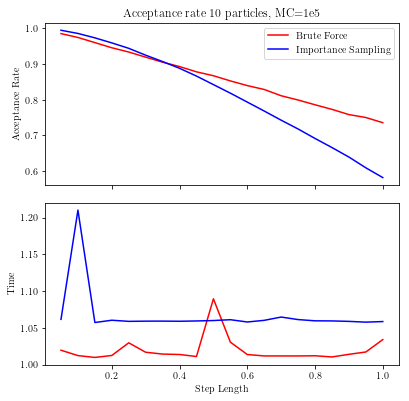

In [9]:
fig = plt.figure()
w = 5.78851          # Latex document text width
fig.set_size_inches(w=w*1.0,h= 5.5)

ax1 = fig.add_subplot(211)
ax1.plot(bruteForce10.iloc[:,0], bruteForce10['Rate'], color='r',label='Brute Force')
ax1.plot(importanceSampling10.iloc[:,0], importanceSampling10['Rate'], color='b', label='Importance Sampling')
ax1.set_ylabel('Acceptance Rate')
ax1.xaxis.set_major_formatter(plt.NullFormatter())
#ax1.legend(loc='lower left', bbox_to_anchor= (0.0, 1.01), ncol=2, 
#            borderaxespad=0, frameon=False)
ax1.legend(loc='upper right')

ax2 = plt.subplot(212)
ax2.plot(bruteForce10.iloc[:,0], bruteForce10['Time'], color='r')
ax2.plot(importanceSampling10.iloc[:,0], importanceSampling10['Time'], color='b')
ax2.set_xlabel('Step Length')
ax2.set_ylabel('Time')

fig.tight_layout()  # otherwise the right y-label is slightly clipped
ax1.set_title('Acceptance rate 10 particles, MC=1e5')

plt.savefig(data_path('Task_c/brutevsImp_10_2.pgf'))

plt.show()


### And then 100 particles with MC = 1e5

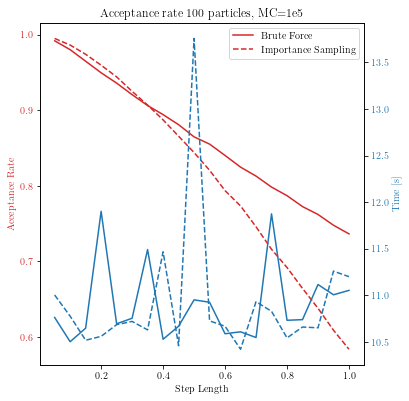

In [10]:
fig, ax1 = plt.subplots()
# plot
w = 5.78851          # Latex document text width
fig.set_size_inches(w=w*1.0,h= 5.5)
color = 'tab:red'
ax1.set_xlabel('Step Length')
ax1.set_ylabel('Acceptance Rate', color=color)


ax1.plot(bruteForce100.iloc[:,0],  bruteForce100['Rate'], color=color, label='Brute Force')
ax1.tick_params(axis='y', labelcolor=color)
ax1.plot(importanceSampling100.iloc[:,0],  importanceSampling100['Rate'], color=color,linestyle='dashed', label='Importance Sampling')


ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color = 'tab:blue'
ax2.set_ylabel('Time [s]', color=color)  # we already handled the x-label with ax1
ax2.plot(bruteForce100.iloc[:,0], bruteForce100['Time'], color=color,label=False)
ax2.plot(importanceSampling100.iloc[:,0], importanceSampling100['Time'], color=color, linestyle='dashed')
ax2.tick_params(axis='y', labelcolor=color)


#ax1.legend(loc='lower left', bbox_to_anchor= (0.0, 1.01), ncol=2, 
#            borderaxespad=0, frameon=False)
ax1.legend(loc='upper right')

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.title('Acceptance rate 100 particles, MC=1e5')
plt.savefig(data_path('Task_c/brutevsImp_100_1.pgf'))
plt.show()

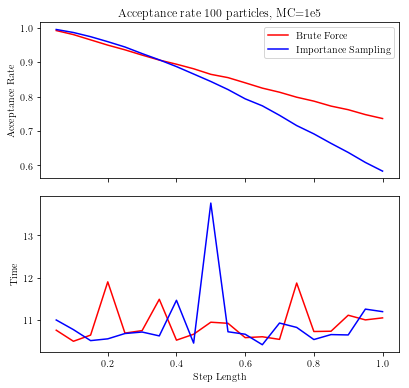

In [11]:
fig = plt.figure()
w = 5.78851          # Latex document text width
fig.set_size_inches(w=w*1.0,h= 5.5)

ax1 = fig.add_subplot(211)
ax1.set_title('Acceptance rate 100 particles, MC=1e5')
ax1.plot(bruteForce100.iloc[:,0], bruteForce100['Rate'], color='r',label='Brute Force')
ax1.plot(importanceSampling100.iloc[:,0], importanceSampling100['Rate'], color='b', label='Importance Sampling')
ax1.set_ylabel('Acceptance Rate')
ax1.xaxis.set_major_formatter(plt.NullFormatter())
#ax1.legend(loc='lower left', bbox_to_anchor= (0.0, 1.01), ncol=2, 
#            borderaxespad=0, frameon=False)

ax1.legend()
ax2 = plt.subplot(212)
ax2.plot(bruteForce100.iloc[:,0], bruteForce100['Time'], color='r')
ax2.plot(importanceSampling100.iloc[:,0], importanceSampling100['Time'], color='b')
ax2.set_xlabel('Step Length')
ax2.set_ylabel('Time')

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.savefig(data_path('Task_c/brutevsImp_100_2.pgf'))
plt.show()

## Repulsive approach 

So far, we have only been looking at particles with no interaction. Now it is time to turn to the elliptic trap with a repulsive interaction. Once again, we will have to tune the variational parameter $\alpha$. 

In [12]:
gd_alphas = {}
alphas = []

for i in range(3,8):
    gd_alphas['alpha0'+str(i)] =  pd.read_fwf(data_path("Task_e/GD_10particles_0."\
                                                        + str(i) + "00000alpha.dat"))['Energy']
    gd_alphas['50alpha0'+str(i)] =  pd.read_fwf(data_path("Task_e/GD_100particles_0."\
                                                        + str(i) + "00000alpha.dat"))['Energy']
    gd_alphas['100alpha0'+str(i)] =  pd.read_fwf(data_path("Task_e/GD_100particles_0."\
                                                        + str(i) + "00000alpha.dat"))['Energy']
    alphas.append(float(i)*0.1)


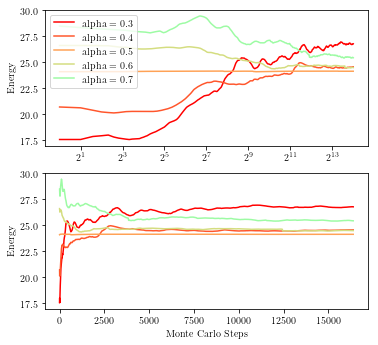

In [13]:
fig= plt.figure()
fig.set_size_inches(w=w*1.0,h= 5.5)

ax1 = fig.add_subplot(211)
color=iter(cm.rainbow(np.linspace(1,0,10)))
c = next(color)
for i in range(3,8):
    ax1.plot(np.linspace(1,len(gd_alphas['alpha0'+str(i)]),len(gd_alphas['alpha0'+str(i)])),\
             gd_alphas['alpha0'+str(i)], color = c, label = 'alpha = 0.'+ str(i))
    c = next(color)
ax1.legend(loc='best')
ax1.set_xscale('log', basex=2)
ax1.set_ylabel('Energy')

color=iter(cm.rainbow(np.linspace(1,0,10)))
c = next(color)
for i in range(3,8):
    ax2.plot(np.linspace(1,len(gd_alphas['alpha0'+str(i)]),len(gd_alphas['alpha0'+str(i)])),\
             gd_alphas['alpha0'+str(i)], color = c)
    c = next(color)


#ax2 = fig.add_axes([0.750, 0.455, 0.15, 0.15])
#ax2.set(xlim=(9.99995, 10.00004), ylim=(14.99978, 15.0001))
#ax2.set_xscale('log')
#ax2.set_yscale('log')
#0.1*2^17  = 0.8*2^14 which is around 10%
#2^15 = 25% of 2^17. 
#ax1.plot([int(2**15),int(2**15)], [0,100], linestyle = 'dashed')


ax2 = fig.add_subplot(212)
color=iter(cm.rainbow(np.linspace(1,0,10)))
c = next(color)
for i in range(3,8):
    ax2.plot(np.linspace(1,len(gd_alphas['alpha0'+str(i)]),len(gd_alphas['alpha0'+str(i)])),\
             gd_alphas['alpha0'+str(i)], color = c, label = 'alpha = 0.'+ str(i))
    c = next(color)
#ax2.set(ylim=(10, 70))
#ax1.set_xscale('log')
ax2.set_ylabel('Energy')
ax2.set_xlabel('Monte Carlo Steps')
#ax2.plot([int(2**15),int(2**15)], [0,100], linestyle = 'dashed')

plt.title('')
plt.savefig(data_path('Task_e/Energy_MC_alphas.pgf'))
plt.show()


## Blocking

In performing the Monte Carlo analysis we will use the blocking technique to make the statistical analysis of the numerical data. 

In [14]:
def block(x):
    # preliminaries
    n = len(x)
    d = int(np.log2(n))
    s, gamma = np.zeros(d), np.zeros(d)
    mu = np.mean(x)

    # estimate the auto-covariance and variances
    # for each blocking transformation
    for i in np.arange(0,d):
        n = len(x)
        # estimate autocovariance of x
        gamma[i] = (n)**(-1)*np.sum( (x[0:(n-1)]-mu)*(x[1:n]-mu) )
        # estimate variance of x

        s[i] = np.var(x)
        # perform blocking transformation
        x = 0.5*(x[0::2] + x[1::2])

    # generate the test observator M_k from the theorem
    M = (np.cumsum( ((gamma/s)**2*2**np.arange(1,d+1)[::-1])[::-1] )  )[::-1]

    # we need a list of magic numbers
    q =np.array([6.634897,9.210340, 11.344867, 13.276704, 15.086272, 16.811894, 18.475307, 20.090235, 21.665994, 23.209251, 24.724970, 26.216967, 27.688250, 29.141238, 30.577914, 31.999927, 33.408664, 34.805306, 36.190869, 37.566235, 38.932173, 40.289360, 41.638398, 42.979820, 44.314105, 45.641683, 46.962942, 48.278236, 49.587884, 50.892181])

     # use magic to determine when we should have stopped blocking
    for k in np.arange(0,d):
        if(M[k] < q[k]):
            break
    if (k >= d-1):
        print("Warning: Use more data")
    return mu, s[k]/2**(d-k)

In [15]:
def use_blocking(numParticles):
    frame = {}
    mean_list = []
    std_list = []

    for i in range(3,8):
        infile =  open(data_path("Task_e/GD_"+str(numParticles)+"particles_0."+ str(i) + "00000alpha.dat"),'r')
        infile.readline()
        data = np.loadtxt(infile)
        data = data[:]
        (mean, var) = block(data)
        std = np.sqrt(var)
        mean_list.append(mean)
        std_list.append(std)
    
    frame['Mean'] = mean_list
    frame['STDev'] = std_list
    frame['Alpha'] = alphas

    frame = pd.DataFrame(frame)
    return frame 
frame10 = use_blocking(10)
frame50 = use_blocking(50)
frame100= use_blocking(100)
print("10 particles:")
print(frame10)
print("\n50 particles:")
print(frame50)
print("\n100 particles:")
print(frame100)

10 particles:
        Mean     STDev  Alpha
0  26.316230  0.133169    0.3
1  24.377328  0.073542    0.4
2  24.130986  0.001258    0.5
3  24.633056  0.027763    0.6
4  25.824561  0.100985    0.7

50 particles:
         Mean     STDev  Alpha
0  126.544284  2.108948    0.3
1  122.071908  0.579268    0.4
2  121.515700  0.012836    0.5
3  123.791601  0.367288    0.6
4  128.309008  0.686831    0.7

100 particles:
         Mean     STDev  Alpha
0  256.514203  5.303598    0.3
1  246.038365  1.992551    0.4
2  245.006334  0.017465    0.5
3  253.617043  0.642319    0.6
4  261.152648  1.386691    0.7


### 10 particles

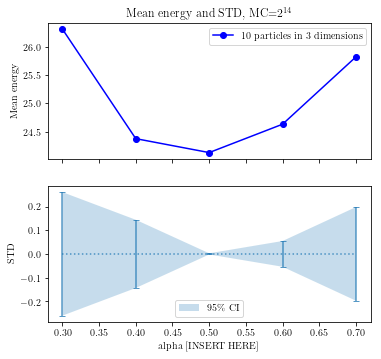

In [16]:
zero_array = np.zeros(len(frame10['Alpha']))
# plot
fig = plt.figure()
w = 5.78851          # Latex document text width
fig.set_size_inches(w=w*1.0,h= 5.5)
# only errorbar
ax1 = plt.subplot(211)

#In case of more plots, we will make sure it's easy to add in a loop
for data in [frame10]:
    ax1.plot(data['Alpha'],data['Mean'],'ob-')
# errorbar + fill_between
ax1.set_ylabel("Mean energy")
ax1.legend(['10 particles in 3 dimensions'])
ax1.xaxis.set_major_formatter(plt.NullFormatter())


ax2 = plt.subplot(212)
#In case of more plots, we will make sure it's easy to add in a loop
for data in [frame10]:
    ax2.errorbar(x=data['Alpha'],y=zero_array,yerr=1.96*data['STDev'], alpha=.75, fmt=':', capsize=3, capthick=1)
    data = {
        'x': data['Alpha'],
        'y1': [y - e for y, e in zip(zero_array, 1.96*data['STDev'])],
        'y2': [y + e for y, e in zip(zero_array, 1.96*data['STDev'])]}
    ax2.fill_between(**data, alpha=.25)
#ax2.set_title('STD after blocking method ')
ax2.set_xlabel('alpha [INSERT HERE]')
ax2.set_ylabel('STD')
ax2.legend(['$95\%$ CI'])

ax1.set_title('Mean energy and STD, MC=$2^{14}$')
plt.savefig(data_path('Task_e/blocking_alphas_10particles.pgf'))
plt.show()


### 50 particles

We are here 60% sure that the exact value is within the standard deviation. 

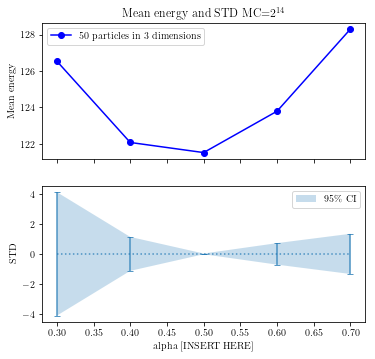

In [17]:
zero_array = np.zeros(len(frame50['Alpha']))
# plot
fig = plt.figure()
w = 5.78851          # Latex document text width
fig.set_size_inches(w=w*1.0,h= 5.5)
# only errorbar
ax1 = plt.subplot(211)

#In case of more plots, we will make sure it's easy to add in a loop
for data in [frame50]:
    ax1.plot(data['Alpha'],data['Mean'],'ob-')
# errorbar + fill_between
ax1.set_ylabel("Mean energy")
ax1.legend(['50 particles in 3 dimensions'])
ax1.xaxis.set_major_formatter(plt.NullFormatter())


ax2 = plt.subplot(212)
#In case of more plots, we will make sure it's easy to add in a loop
for data in [frame50]:
    ax2.errorbar(x=data['Alpha'],y=zero_array,yerr=1.96*data['STDev'], alpha=.75, fmt=':', capsize=3, capthick=1)
    data = {
        'x': data['Alpha'],
        'y1': [y - e for y, e in zip(zero_array, 1.96*data['STDev'])],
        'y2': [y + e for y, e in zip(zero_array, 1.96*data['STDev'])]}
    ax2.fill_between(**data, alpha=.25)
#ax2.set_title('STD after blocking method ')
ax2.set_xlabel('alpha [INSERT HERE]')
ax2.set_ylabel('STD')
ax2.legend(['$95\%$ CI'])

ax1.set_title('Mean energy and STD MC=$2^{14}$')
plt.savefig(data_path('Task_e/blocking_alphas_50particles.pgf'))

plt.show()


### 100 particles

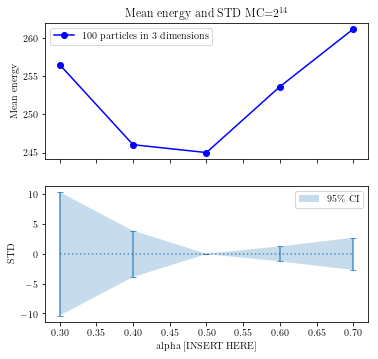

In [18]:
zero_array = np.zeros(len(frame100['Alpha']))
# plot
fig = plt.figure()
w = 5.78851          # Latex document text width
fig.set_size_inches(w=w*1.0,h= 5.5)
# only errorbar
ax1 = plt.subplot(211)

#In case of more plots, we will make sure it's easy to add in a loop
for data in [frame100]:
    ax1.plot(data['Alpha'],data['Mean'],'ob-')
# errorbar + fill_between
ax1.set_ylabel("Mean energy")
ax1.legend(['100 particles in 3 dimensions'])
ax1.xaxis.set_major_formatter(plt.NullFormatter())


ax2 = plt.subplot(212)
#In case of more plots, we will make sure it's easy to add in a loop
for data in [frame100]:
    ax2.errorbar(x=data['Alpha'],y=zero_array,yerr=1.96*data['STDev'], alpha=.75, fmt=':', capsize=3, capthick=1)
    data = {
        'x': data['Alpha'],
        'y1': [y - e for y, e in zip(zero_array, 1.96*data['STDev'])],
        'y2': [y + e for y, e in zip(zero_array, 1.96*data['STDev'])]}
    ax2.fill_between(**data, alpha=.25)
#ax2.set_title('STD after blocking method ')
ax2.set_xlabel('alpha [INSERT HERE]')
ax2.set_ylabel('STD')
ax2.legend(['$95\%$ CI'])

ax1.set_title('Mean energy and STD MC=$2^{14}$')
plt.savefig(data_path('Task_e/blocking_alphas_100particles.pgf'))

plt.show()

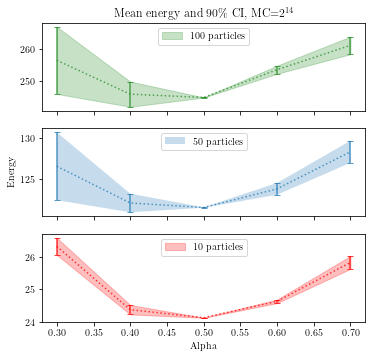

In [19]:
zero_array = np.zeros(len(frame100['Alpha']))
# plot
fig = plt.figure()
w = 5.78851          # Latex document text width
fig.set_size_inches(w=w*1.0,h= 5.5)
# only errorbar
ax3 = plt.subplot(313)
#ax3.xaxis.set_major_formatter(plt.NullFormatter())
#In case of more plots, we will make sure it's easy to add in a loop
for data in [frame10]:
    ax3.errorbar(x=data['Alpha'],y=data['Mean'],yerr=1.96*data['STDev'],color='red', alpha=.75, fmt=':', capsize=3, capthick=1)
    data = {
        'x': data['Alpha'],
        'y1': [y - e for y, e in zip(data['Mean'], 1.96*data['STDev'])],
        'y2': [y + e for y, e in zip(data['Mean'], 1.96*data['STDev'])]}
    ax3.fill_between(**data, alpha=.25,color='red')
ax3.legend(['10 particles'],loc='upper center')


ax2 = plt.subplot(312)
ax2.xaxis.set_major_formatter(plt.NullFormatter())

for data in [frame50]:
    ax2.errorbar(x=data['Alpha'],y=data['Mean'],yerr=1.96*data['STDev'], alpha=.75, fmt=':', capsize=3, capthick=1)
    data = {
        'x': data['Alpha'],
        'y1': [y - e for y, e in zip(data['Mean'], 1.96*data['STDev'])],
        'y2': [y + e for y, e in zip(data['Mean'], 1.96*data['STDev'])]}
    ax2.fill_between(**data, alpha=.25)
ax1 = plt.subplot(311)

ax2.legend(['50 particles'])



for data in [frame100]:
    ax1.errorbar(x=data['Alpha'],y=data['Mean'],yerr=1.96*data['STDev'],color='forestgreen', alpha=.75, fmt=':', capsize=3, capthick=1)
    data = {
        'x': data['Alpha'],
        'y1': [y - e for y, e in zip(data['Mean'], 1.96*data['STDev'])],
        'y2': [y + e for y, e in zip(data['Mean'], 1.96*data['STDev'])]}
    ax1.fill_between(**data, alpha=.25,color='forestgreen')
ax1.legend(['100 particles'],loc='upper center')
ax1.xaxis.set_major_formatter(plt.NullFormatter())


ax1.set_title('Mean energy and $90\%$ CI, MC=$2^{14}$')
ax3.set_xlabel('Alpha')
ax2.set_ylabel('Energy')
plt.savefig(data_path('Task_e/blocking_alphas_particlesTOPNOTCH.pgf'))
plt.show()

## Gradient Descent

Instead of manually adjust variational parameters, one can also adjust them automatically by using gradient descent. 

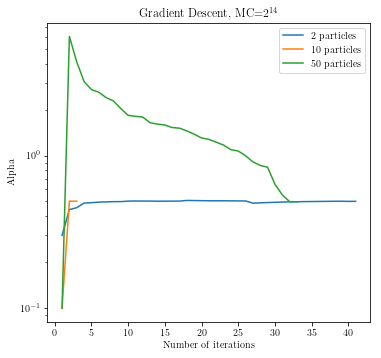

In [20]:
#energies2   = pd.read_fwf(data_path("Task_f/Blocking_2_particles.dat"))
GD2 = pd.read_fwf(data_path("Task_f/Gradient_Descent_2_particles.dat"))
energies10  = pd.read_fwf(data_path("Task_f/Blocking_10_particles.dat"))
GD10 = pd.read_fwf(data_path("Task_f/Gradient_Descent_10_particles.dat"))
GD50 = pd.read_fwf(data_path("Task_f/Gradient_Descent_50_particles.dat"))


fig, ax1 = plt.subplots()
fig.set_size_inches(w=w*1.0,h= 5.5)

#ax1.set_xscale('log')
ax1.set_yscale('log')

ax1.set_ylabel('Alpha')
ax1.set_xlabel('Number of iterations')

x2  = np.linspace(1,len(GD2['Alpha']), len(GD2['Alpha']))
x10 = np.linspace(1,len(GD10['Alpha']),len(GD10['Alpha']))
x50 = np.linspace(1,len(GD50['Alpha']),len(GD50['Alpha']))

ax1.plot(x2, GD2['Alpha'],   label = '2 particles')
ax1.plot(x10, GD10['Alpha'], label = '10 particles')
ax1.plot(x50, GD50['Alpha'], label = '50 particles')



#ax1.hist(x, GD10['Alpha'])
ax1.legend()
plt.title('Gradient Descent, MC=$2^{14}$')
#fig.tight_layout()  # otherwise the right y-label is slightly clipped

plt.savefig(data_path('Task_f/gradient_descent.pgf'))
plt.show()

## One-body density

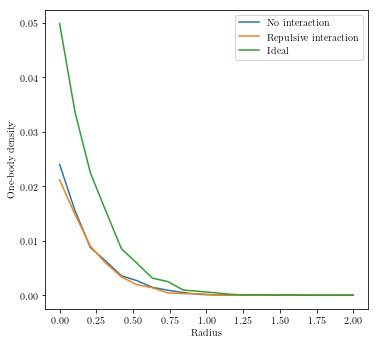

In [21]:
Onebody          = pd.read_fwf(data_path("Task_g/Onebody_Density.dat"))
OnebodyRepulsive = pd.read_fwf(data_path("Task_g/RepulsiveOnebody_Density.dat"))
IdealOnebody     = pd.read_fwf(data_path("Task_g/IdealOnebody_Density.dat"))
Onebody["Counter"]/=2**20
OnebodyRepulsive['Counter']/=2**20
IdealOnebody['Counter']/=2**20
y1 = np.zeros(len(Onebody["Counter"]))
y2 = np.zeros(len(OnebodyRepulsive["Counter"]))


r = 0.01
"""
for i in range(len(Onebody["Counter"])):
    V = 4*(i*(i+1)+ 1/3)*np.pi*r**3
    y1[i] = int(Onebody["Counter"][i]/V)
    y2[i] = int(OnebodyRepulsive['Counter'][i]/V)
"""
x = np.linspace(0, 2, 20)

fig, ax1 = plt.subplots()
fig.set_size_inches(w=w*1.0,h= 5.5)

ax1.plot(x, Onebody["Counter"], label='No interaction')
ax1.plot(x, OnebodyRepulsive['Counter'], label='Repulsive interaction')
ax1.plot(x, IdealOnebody['Counter'], label='Ideal')
ax1.set_xlabel('Radius')
ax1.set_ylabel('One-body density')
ax1.legend()

plt.savefig(data_path('Task_g/one_body_density.pgf'))
plt.show()